# PA 2: Classification - Decision Tree, Naive Bayes

## Student Details:

#### First Student Name and ID: Gagan Ujjini Mallikarjuna 1001851247

#### Second Student Name and ID: Venkata Nagendar Shantiswaroop Adibhatla 1001862413

#### Third Student Name and ID: Mehul Deorao Ganjude 1001990551


In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing
from sklearn.model_selection import train_test_split
#For Classification and to find accuracy
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, accuracy_score
from sklearn import tree

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [2]:
#read the csv file into a Pandas data frame
dataframe = pd.read_csv('cardio_train.csv', encoding='latin1', sep=';')
print("Shape of the Dataframe is",dataframe.shape)

Shape of the Dataframe is (70000, 13)


In [3]:
dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
#return the first 5 rows of the dataset
dataframe.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#return the last 5 rows of the dataset
dataframe.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
print("Dataframe Column Names:",list(dataframe.columns))

Dataframe Column Names: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [7]:
#Here class labels refers to Presence or absence of cardiovascular disease 
#(if its is true/1 then it indicates the presence of cardiovascular disease)
print("Class Labels is:",dataframe.columns[-1])
print("Class Labels values are:",pd.unique(dataframe["cardio"]))

Class Labels is: cardio
Class Labels values are: [0 1]


In [8]:
# PRE-PROCESSING DATASET
#Check for missing values in the dataset, no missing values found
dataframe.columns[dataframe.isnull().any()]

#drop attribute id because values of the attribute id are unique
dataframe = dataframe.drop('id',axis=1)

#Converting the age which was in number of days to years 
dataframe["age"]=round(dataframe["age"]/365)

dataframe

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
dataframe.dtypes

age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [10]:
dataframe.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing the data

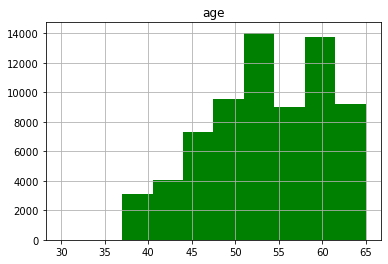

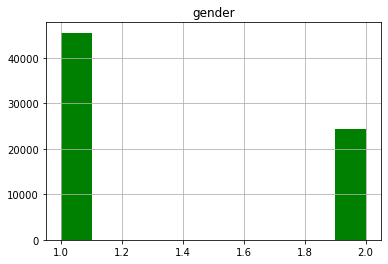

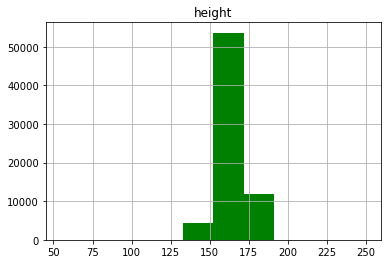

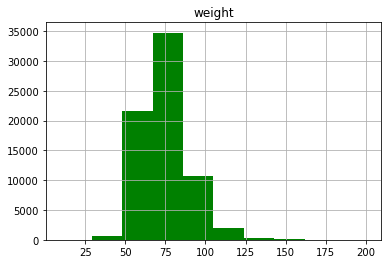

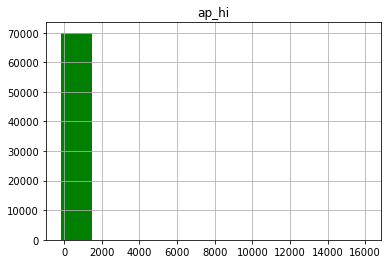

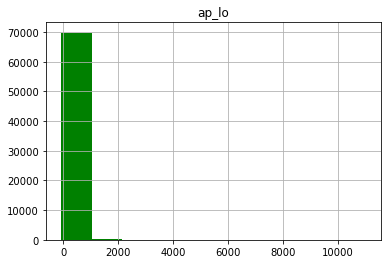

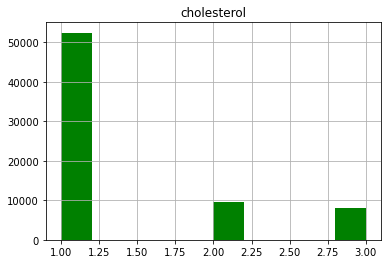

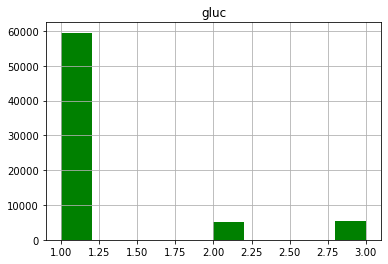

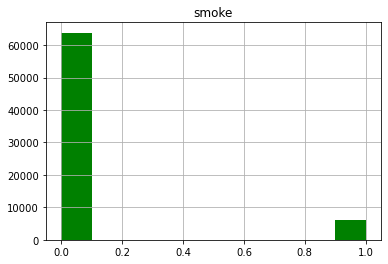

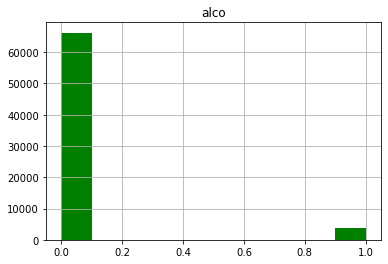

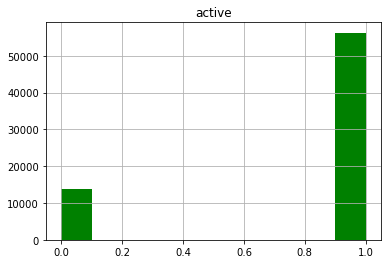

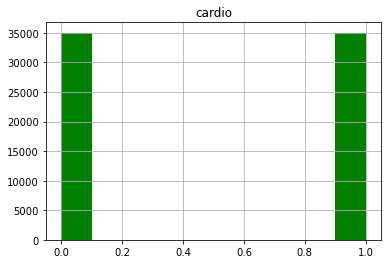

In [11]:
#Histogram for columns in the dataset
for col in dataframe.columns[0:]:
    dataframe.hist(column=col, color='green')

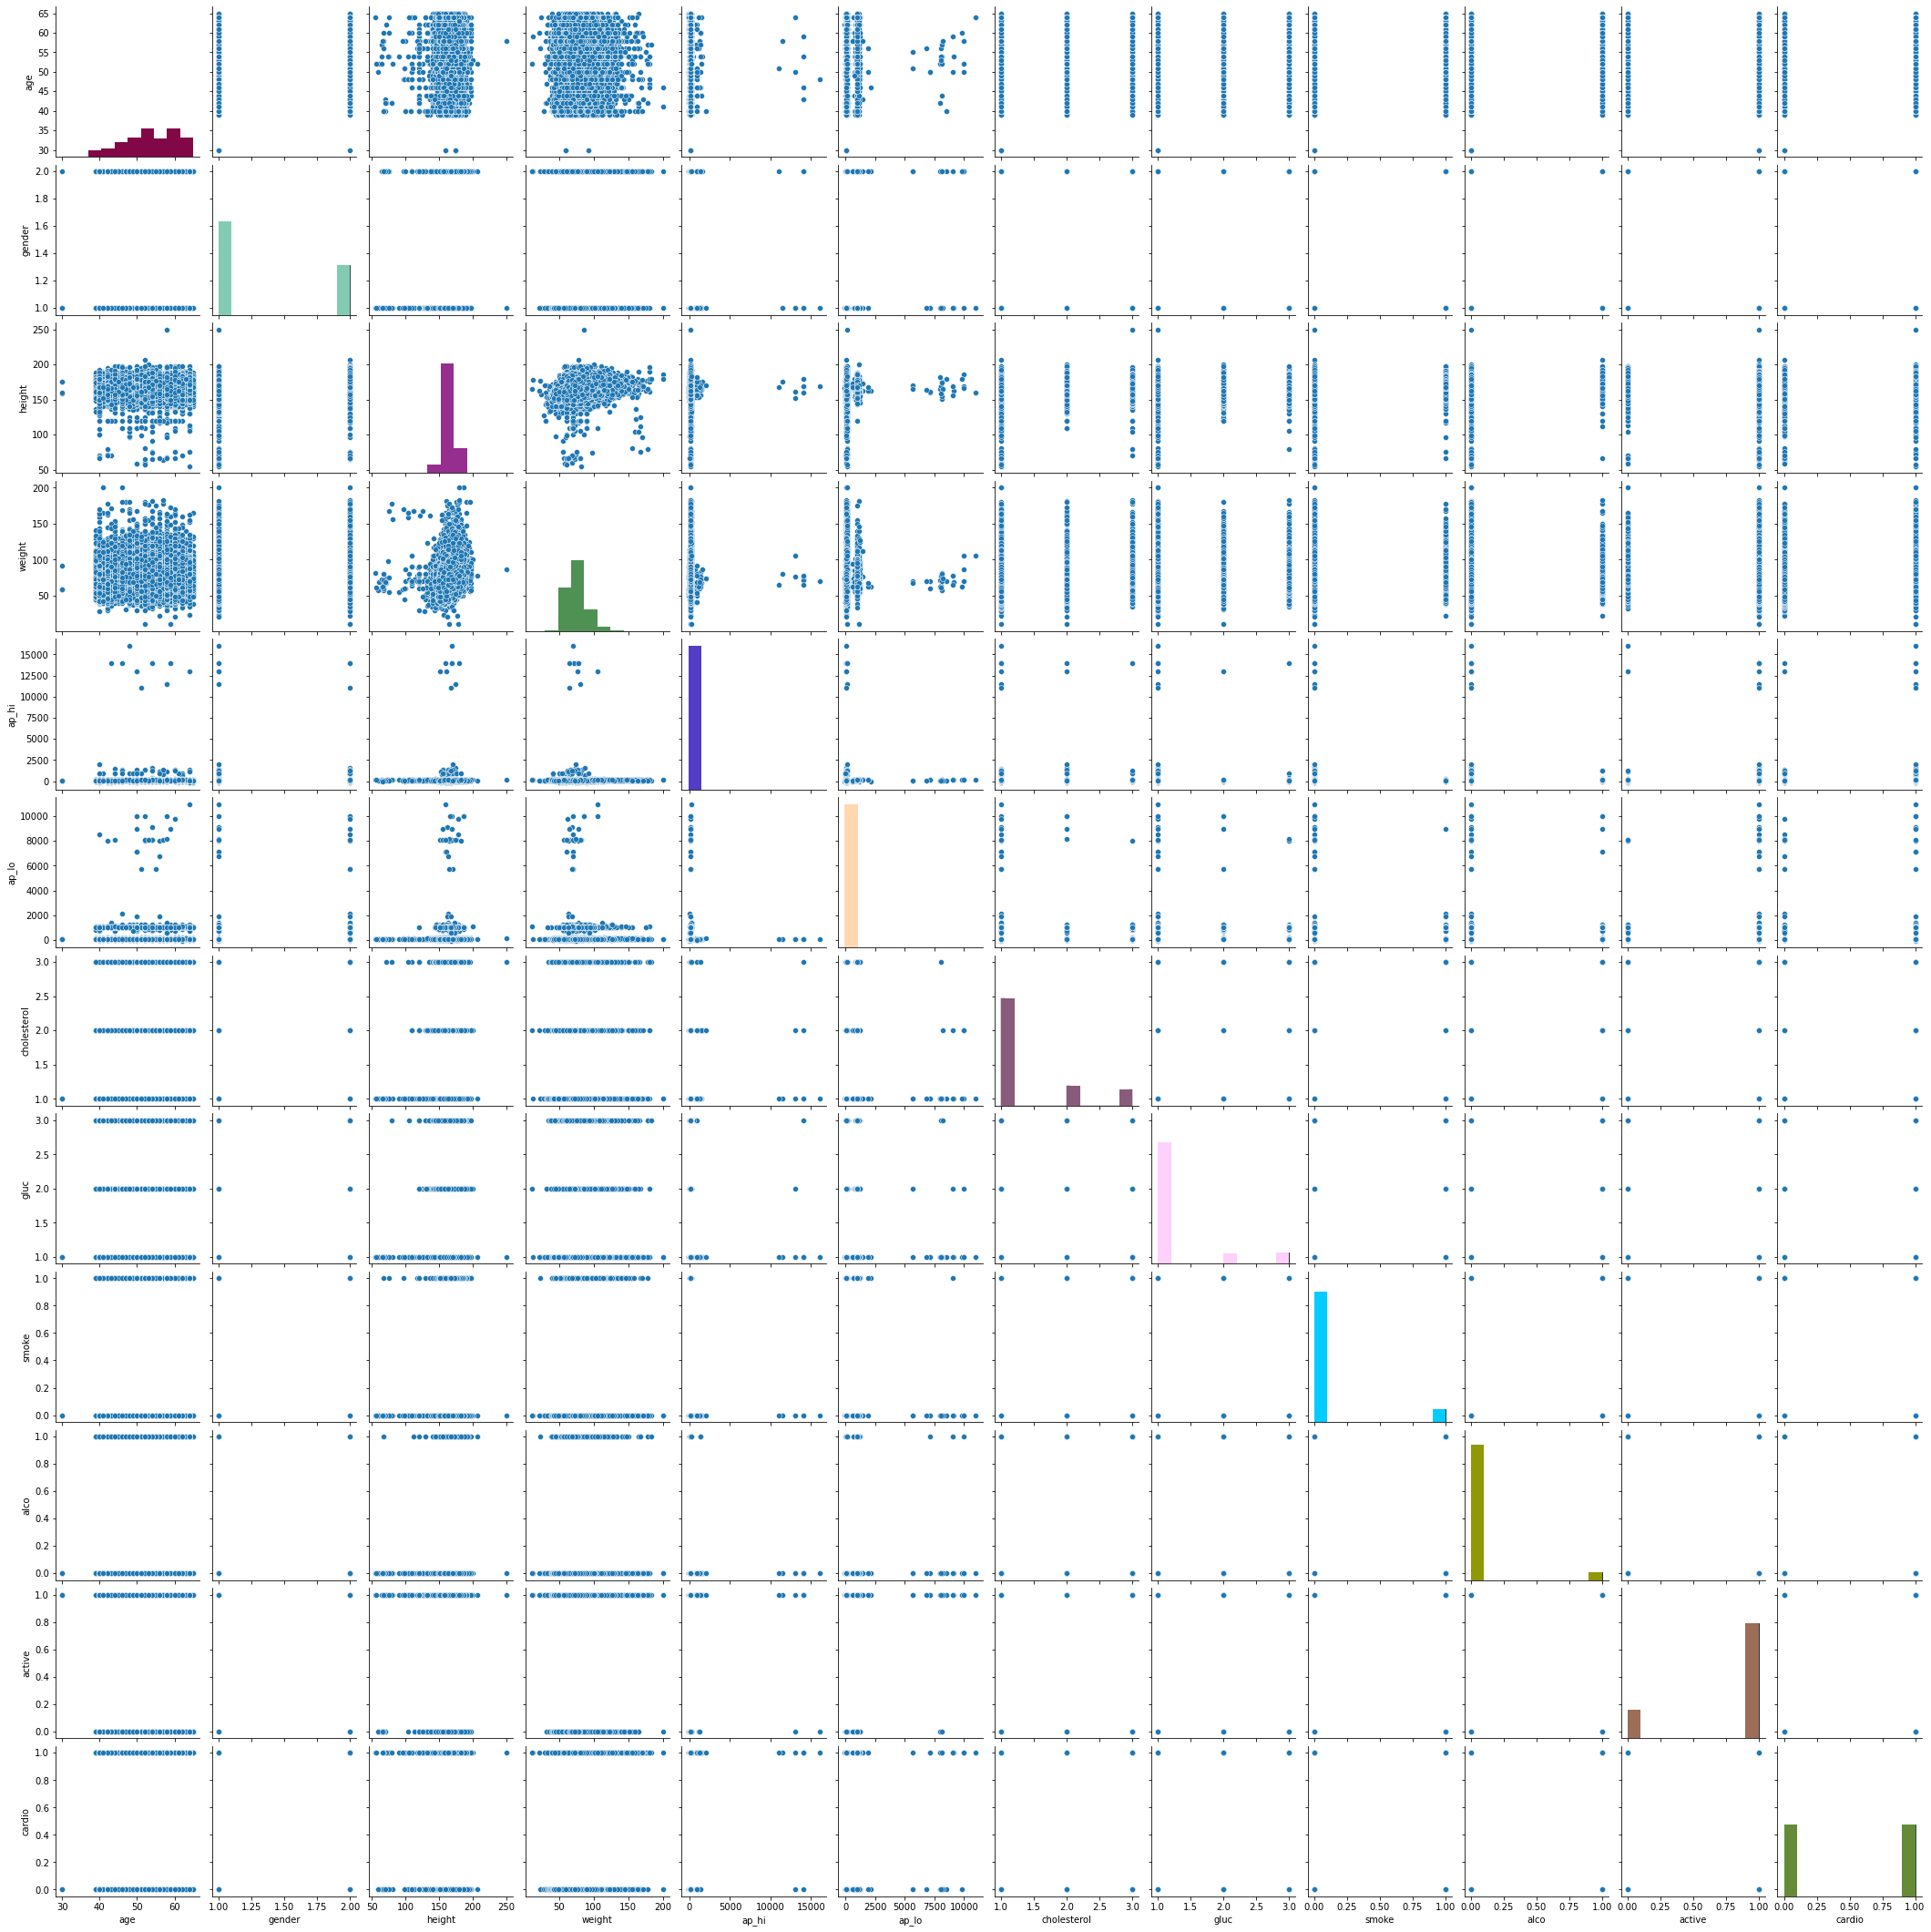

In [12]:
#Data Visualization using pairplot for all attributes

colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)
    
x = sns.pairplot(data=dataframe, diag_kind="hist")
x.map_diag(my_hist)

### Preprocessing the data

In [13]:
#attributes variables stores the attributes of the dataset which helps us to classify whether the patient has cardio 
#disease or not and it contains values from columns age to active 
attributes=dataframe.iloc [:,1:-1].values
#classvar stores the values for class variables which says whether the patient has cardio disease or not using 1 and 0
classvar=dataframe.iloc [:,-1].values
# splitting the dataset into 75% of the data to train the model and rest 25% to test the models performance
# X_train and X_test are the input attributes 
# where X_train is used to train the model and X_test is used to check the model
# y_train and y_test is the class label field which is used for train and testing the model
X_train,X_test,y_train,y_test = train_test_split(attributes,classvar,test_size=0.25)

### Decision Tree with Gini

In [14]:
#Decision Tree with depth 4
dt=tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
dtClassfierWithGini= dt.fit(X_train, y_train)
y_predGini=dtClassfierWithGini.predict(X_test)
#y_predGini is the output classification which the model classified 
print("Accuracy of Decision Tree(in %) with Gini as the hyper parameter : ",dtClassfierWithGini.score(X_test,y_test, sample_weight=None)*100)

Accuracy of Decision Tree(in %) with Gini as the hyper parameter :  72.68571428571428


In [15]:
#Classification report
confusion_matrix_gini=confusion_matrix(y_test, y_predGini)
class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predGini, target_names=class_names))

              precision    recall  f1-score   support

     class 0       0.71      0.78      0.74      8902
     class 1       0.75      0.67      0.71      8598

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



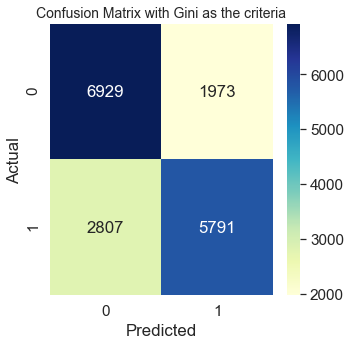

In [16]:
#heatmap for confusion matrix with Gini
cmdfgini= pd.DataFrame(confusion_matrix_gini, range(2), range(2))
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(cmdfgini, annot=True,fmt='g', cmap='YlGnBu')
plt.title("Confusion Matrix with Gini as the criteria", fontsize=14);
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

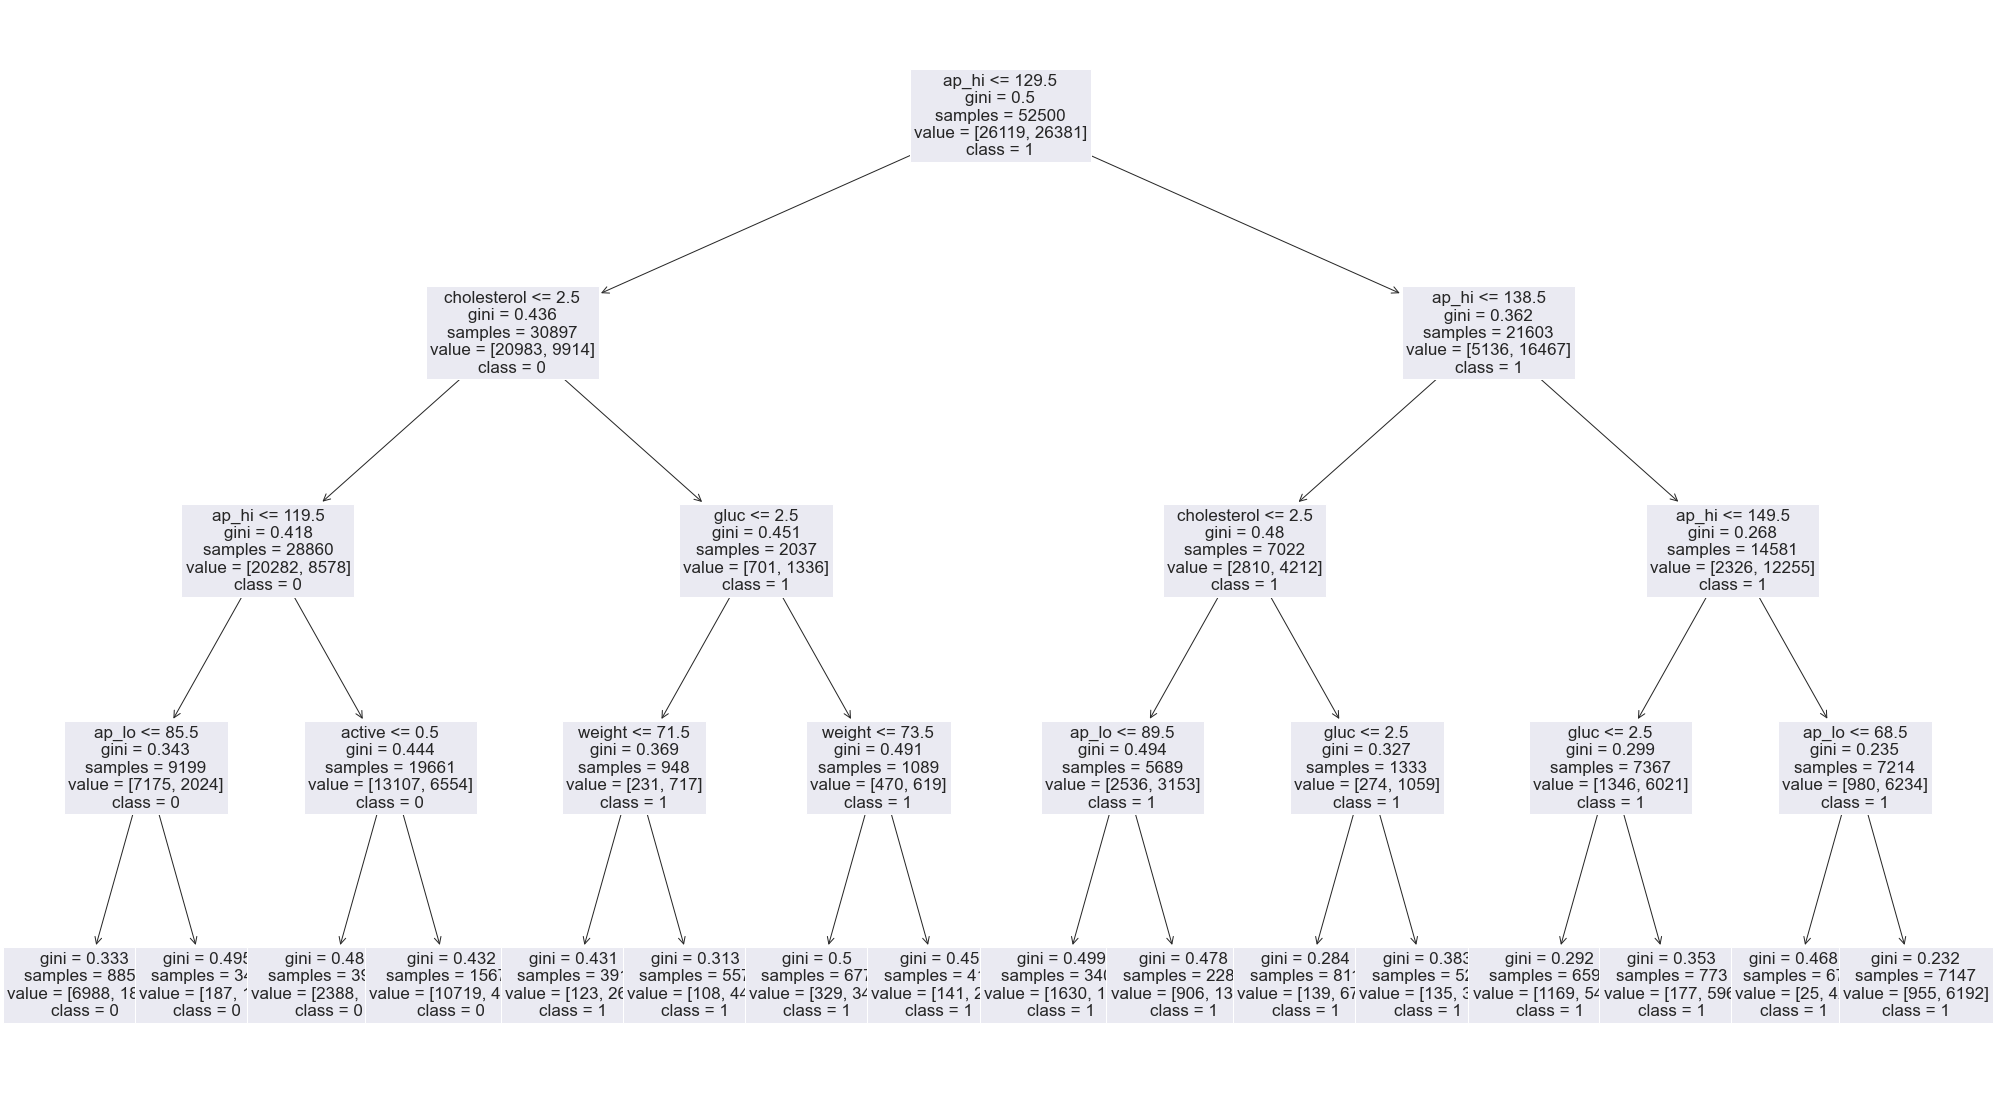

In [17]:
# plot decision tree for Gini Index
plt.figure(figsize=(35,20))
tree.plot_tree(dtClassfierWithGini,fontsize=17,feature_names=list(dataframe.columns)[1:-1],class_names=["0","1"])
plt.show()

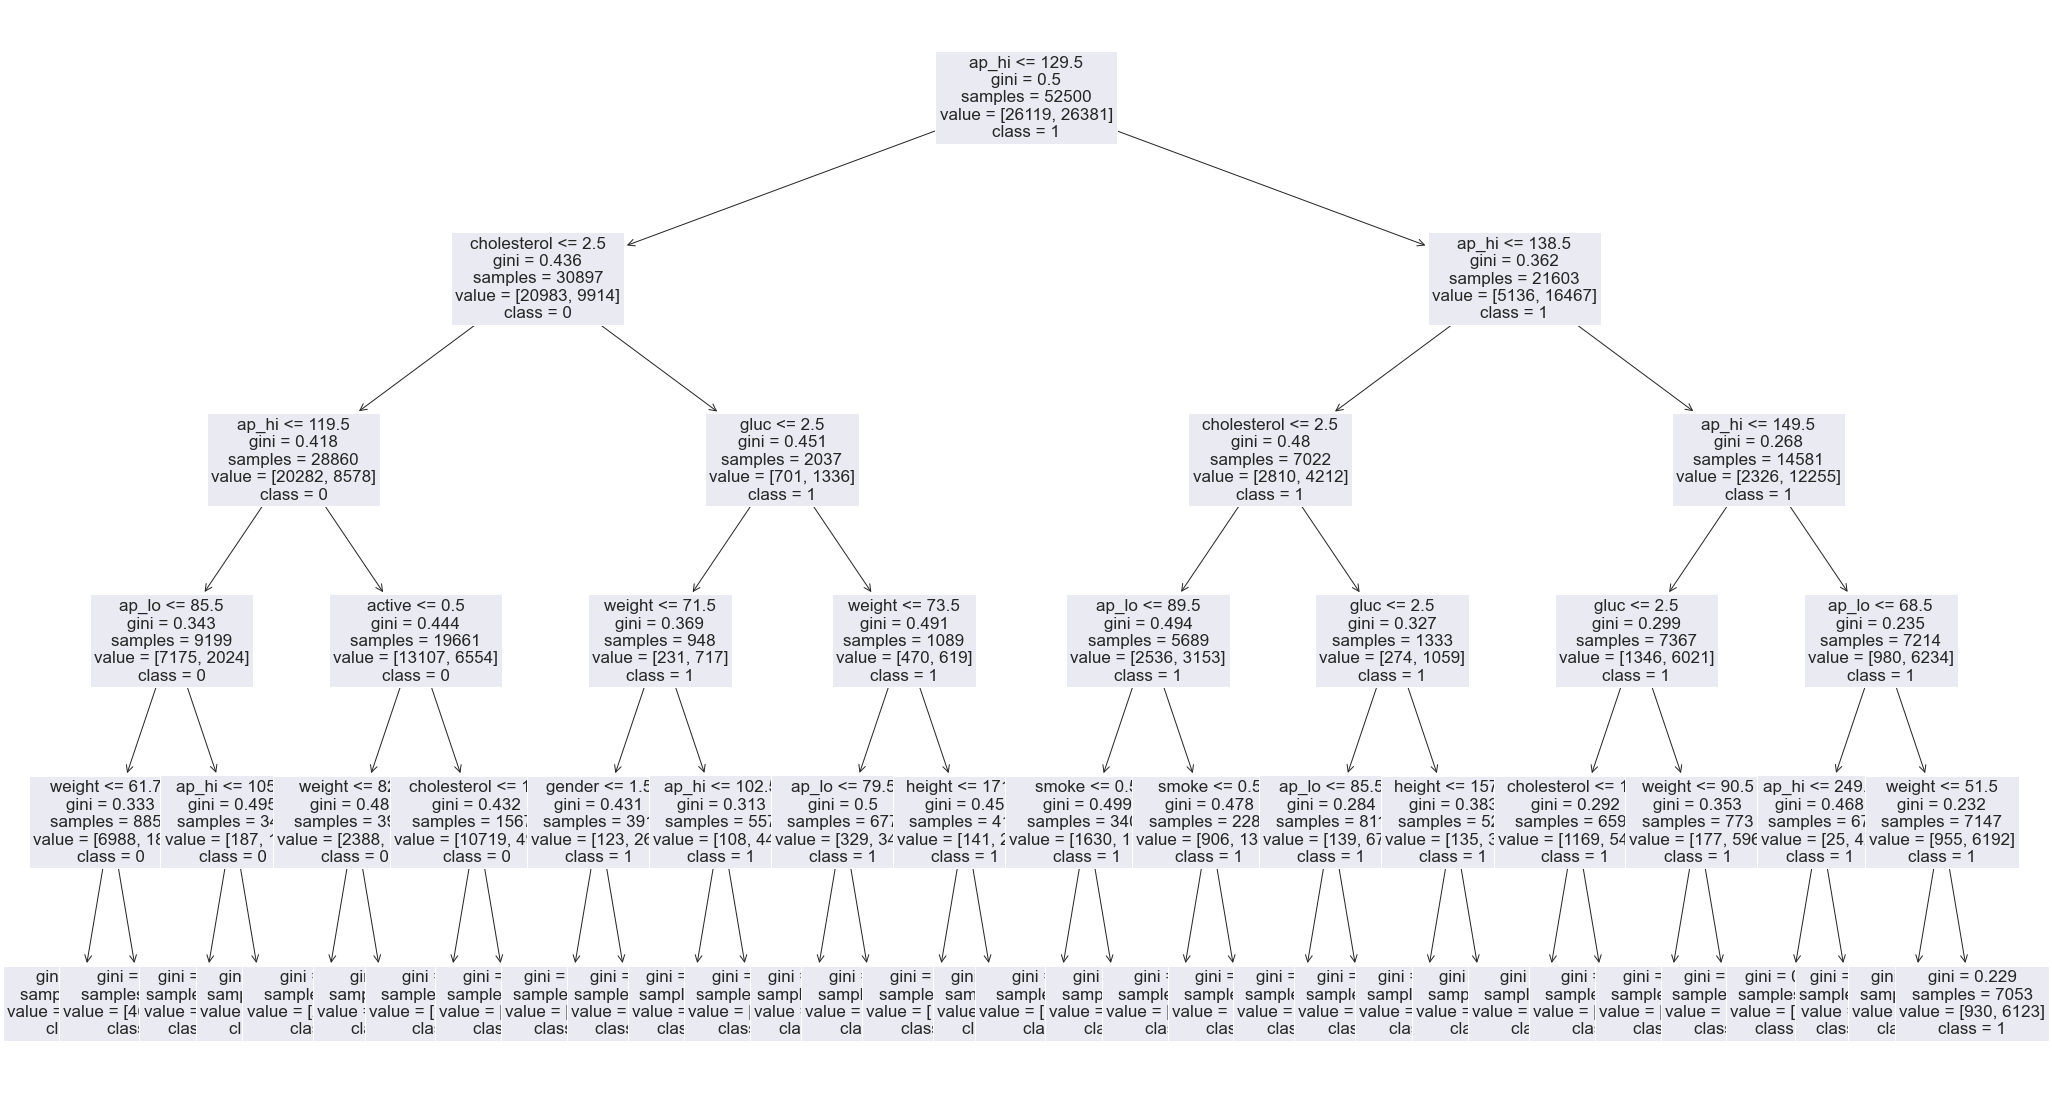

In [18]:
#Decision Tree with depth 5
dt=tree.DecisionTreeClassifier(max_depth=5,criterion='gini')
dtClassfierWithGini= dt.fit(X_train, y_train)
y_predGini=dtClassfierWithGini.predict(X_test)
confusion_matrix_gini=confusion_matrix(y_test, y_predGini)
class_names = ['class 0', 'class 1']
cmdfgini= pd.DataFrame(confusion_matrix_gini, range(2), range(2))

plt.figure(figsize=(35,20))
tree.plot_tree(dtClassfierWithGini,fontsize=17,feature_names=list(dataframe.columns)[1:-1],class_names=["0","1"])
plt.show()

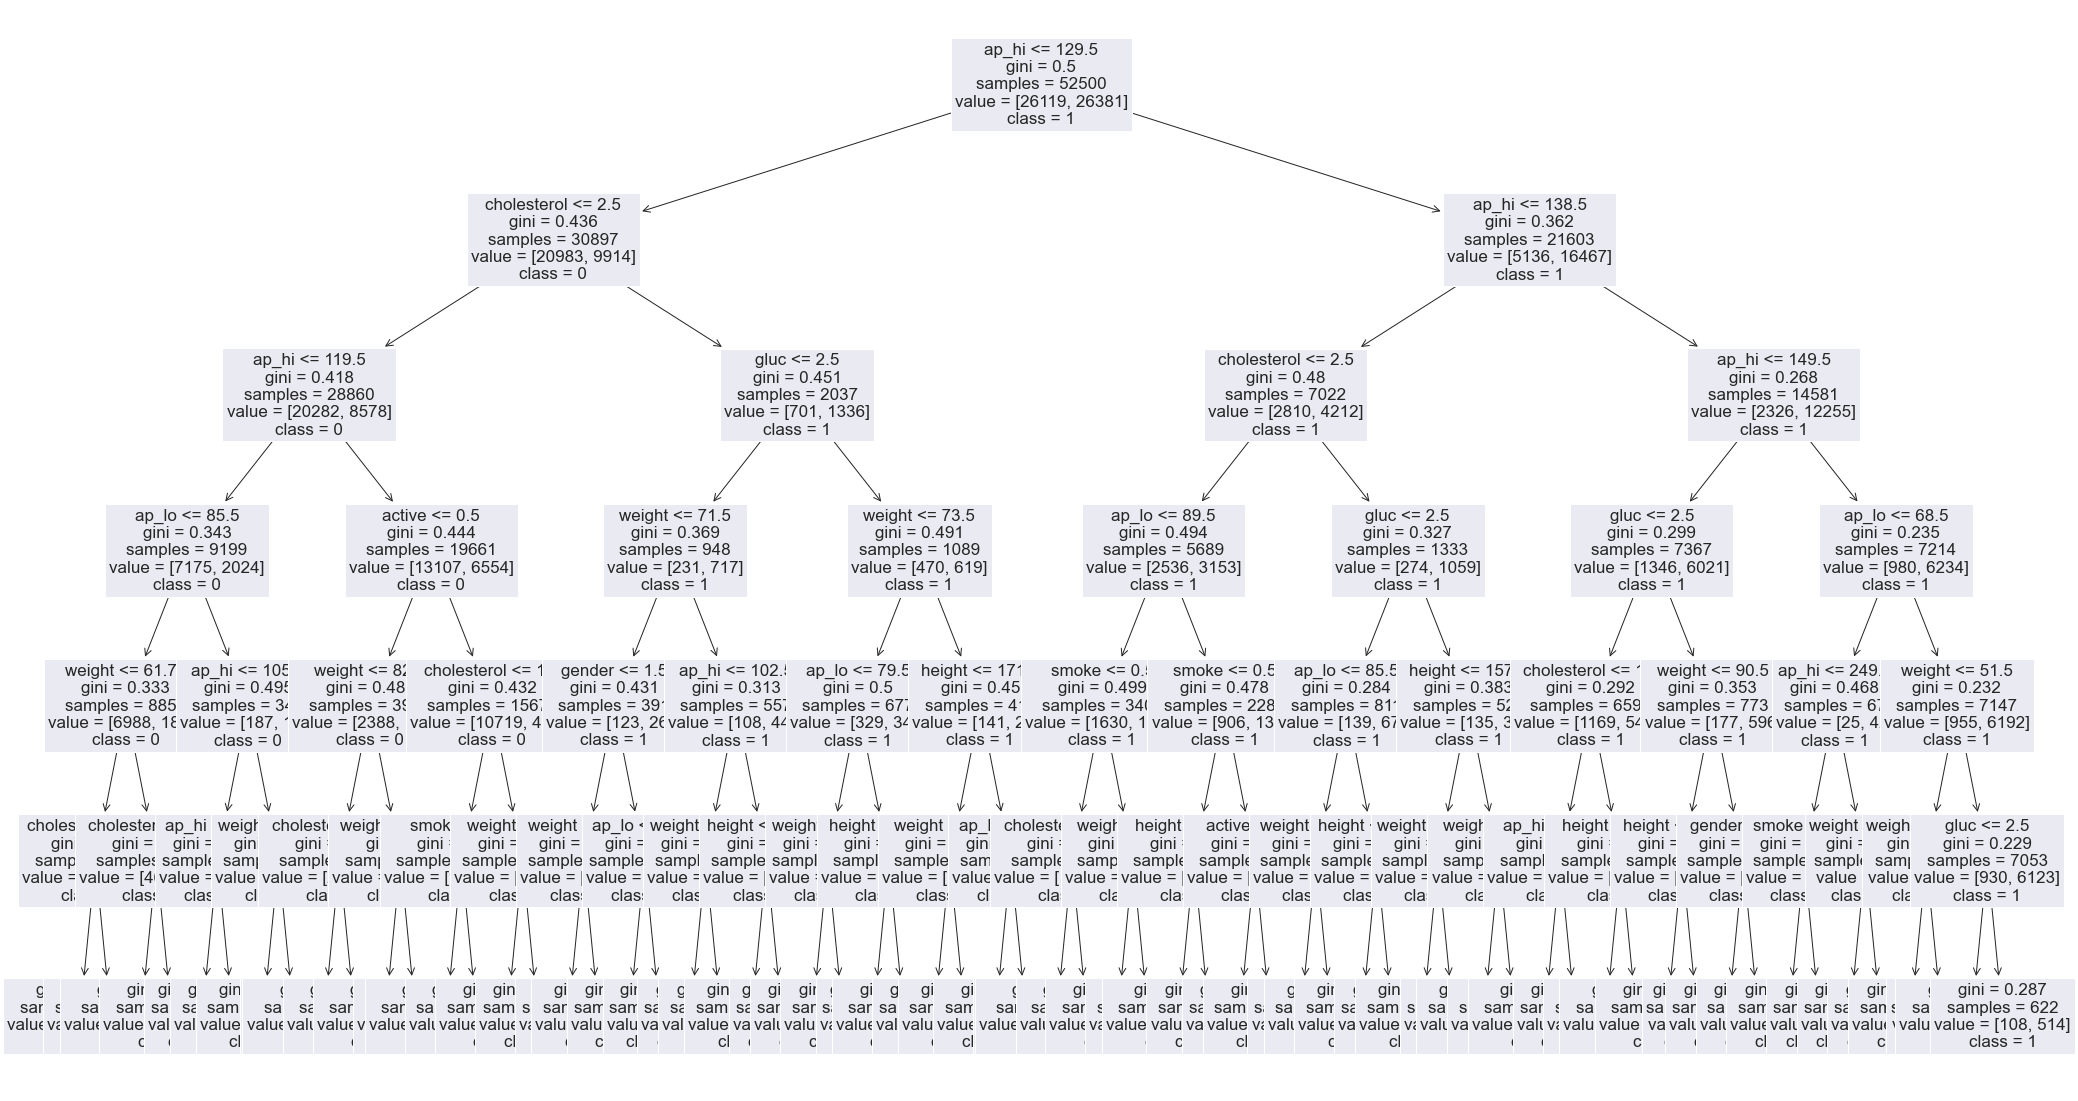

In [19]:
#Decision Tree with depth 6
dt=tree.DecisionTreeClassifier(max_depth=6,criterion='gini')
dtClassfierWithGini= dt.fit(X_train, y_train)
y_predGini=dtClassfierWithGini.predict(X_test)
confusion_matrix_gini=confusion_matrix(y_test, y_predGini)
class_names = ['class 0', 'class 1']
cmdfgini= pd.DataFrame(confusion_matrix_gini, range(2), range(2))

plt.figure(figsize=(35,20))
tree.plot_tree(dtClassfierWithGini,fontsize=17,feature_names=list(dataframe.columns)[1:-1],class_names=["0","1"])
plt.show()

### Decision Tree with Entropy

In [20]:
#Decision Tree with depth 4
dt=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
dtClassfierEntropy= dt.fit(X_train, y_train)
y_predEntropy=dtClassfierEntropy.predict(X_test)
#y_predEntropy is the output classification which the model classified
print("Accuracy of Decision Tree(in %) with Entropy as the hyper parameter : ",dtClassfierEntropy.score(X_test,y_test, sample_weight=None)*100)

Accuracy of Decision Tree(in %) with Entropy as the hyper parameter :  72.68571428571428


In [21]:
#classification report
confusion_matrix_entropy=confusion_matrix(y_test, y_predEntropy)
class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predEntropy, target_names=class_names))

              precision    recall  f1-score   support

     class 0       0.71      0.78      0.74      8902
     class 1       0.75      0.67      0.71      8598

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



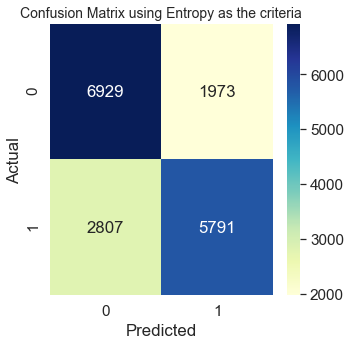

In [22]:
#heatmap for confusion matrix with entropy
cmdfentropy= pd.DataFrame(confusion_matrix_entropy, range(2), range(2))
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(cmdfentropy, annot=True,fmt='g', cmap='YlGnBu')
plt.title("Confusion Matrix using Entropy as the criteria", fontsize=14);
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

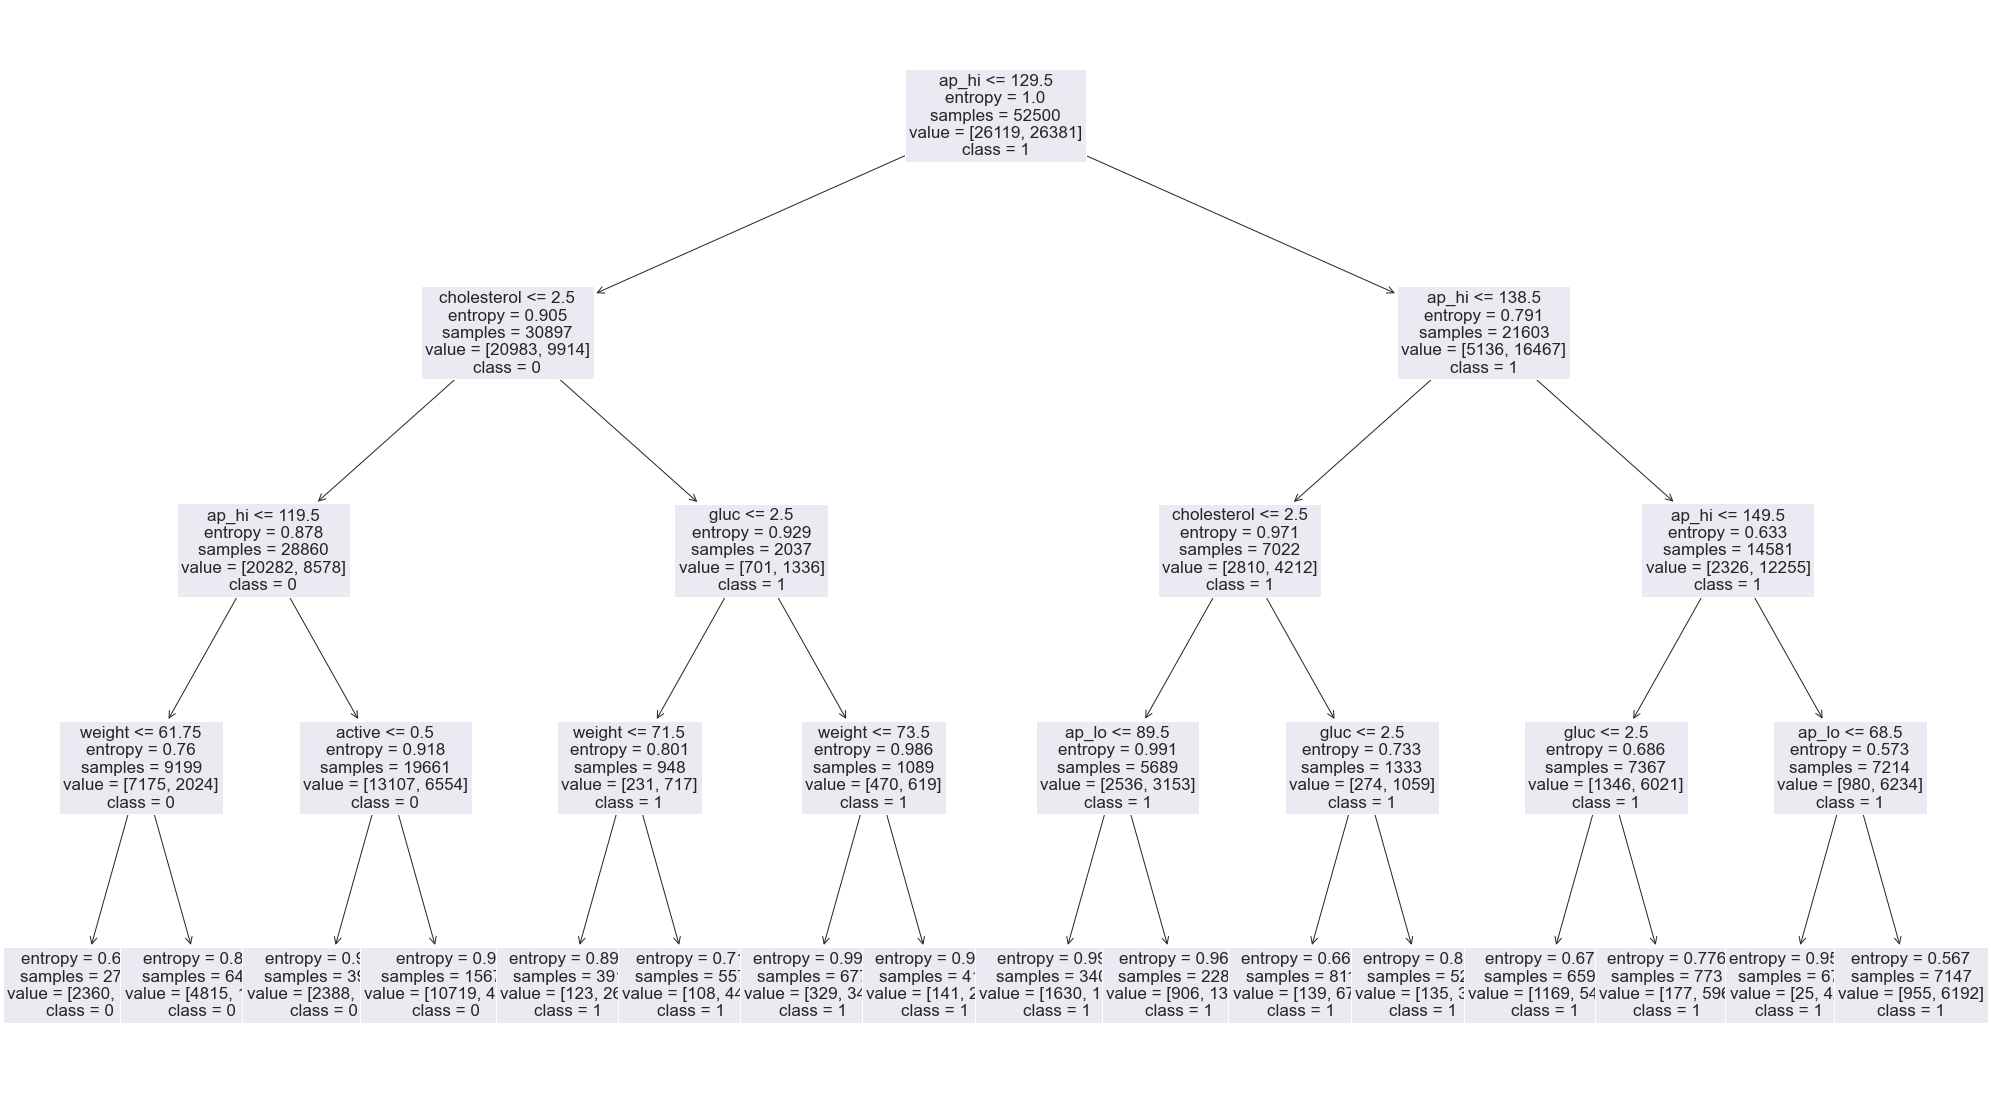

In [23]:
# plot decision tree for Entropy
plt.figure(figsize=(35,20))
tree.plot_tree(dtClassfierEntropy,fontsize=17,feature_names=list(dataframe.columns)[1:-1],class_names=["0","1"])
plt.show()

<Figure size 360x360 with 0 Axes>

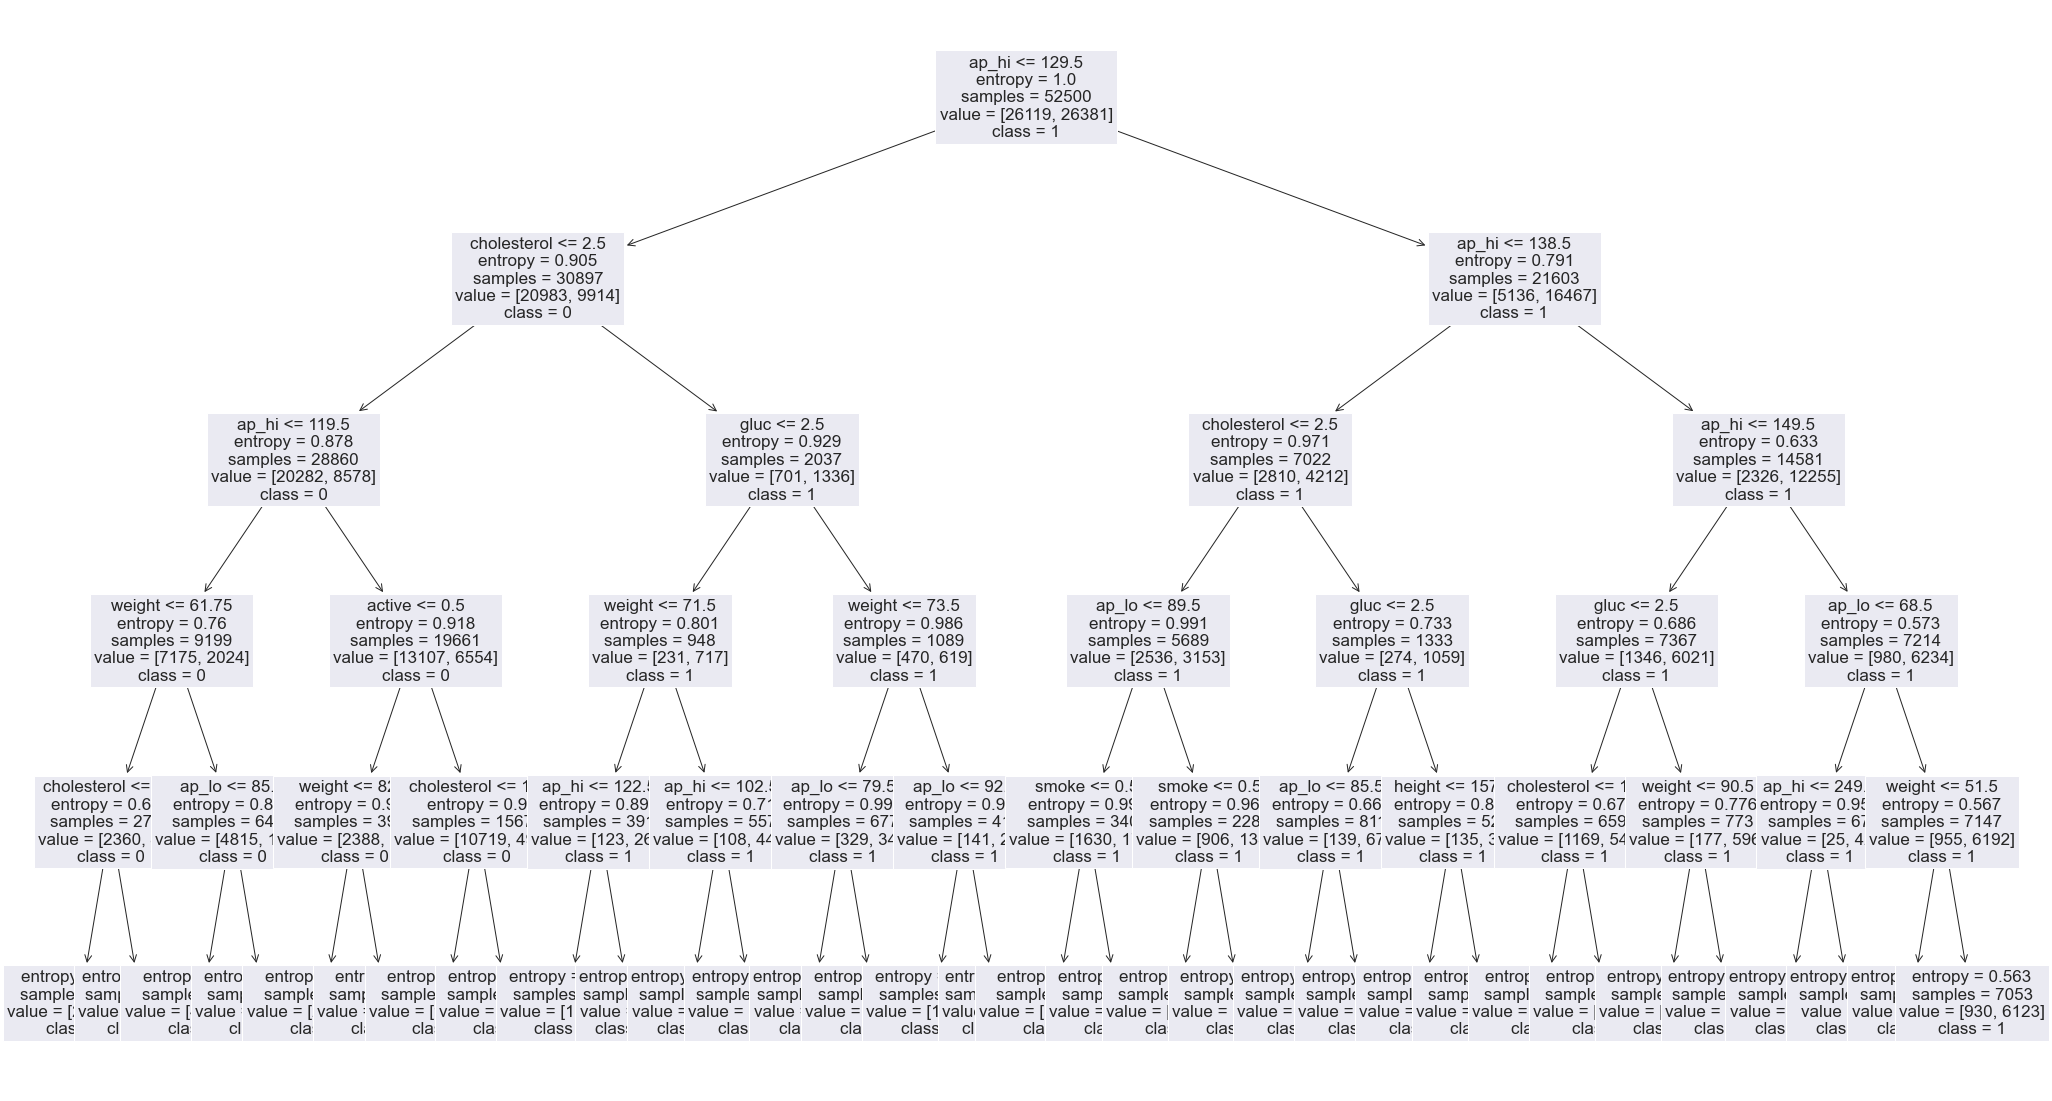

In [24]:
#Decision Tree with depth 5
dt=tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')
dtClassfierEntropy= dt.fit(X_train, y_train)
y_predEntropy=dtClassfierEntropy.predict(X_test)
confusion_matrix_entropy=confusion_matrix(y_test, y_predEntropy)
class_names = ['class 0', 'class 1']
cmdfentropy= pd.DataFrame(confusion_matrix_entropy, range(2), range(2))
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
plt.figure(figsize=(35,20))
tree.plot_tree(dtClassfierEntropy,fontsize=17,feature_names=list(dataframe.columns)[1:-1],class_names=["0","1"])
plt.show()

<Figure size 360x360 with 0 Axes>

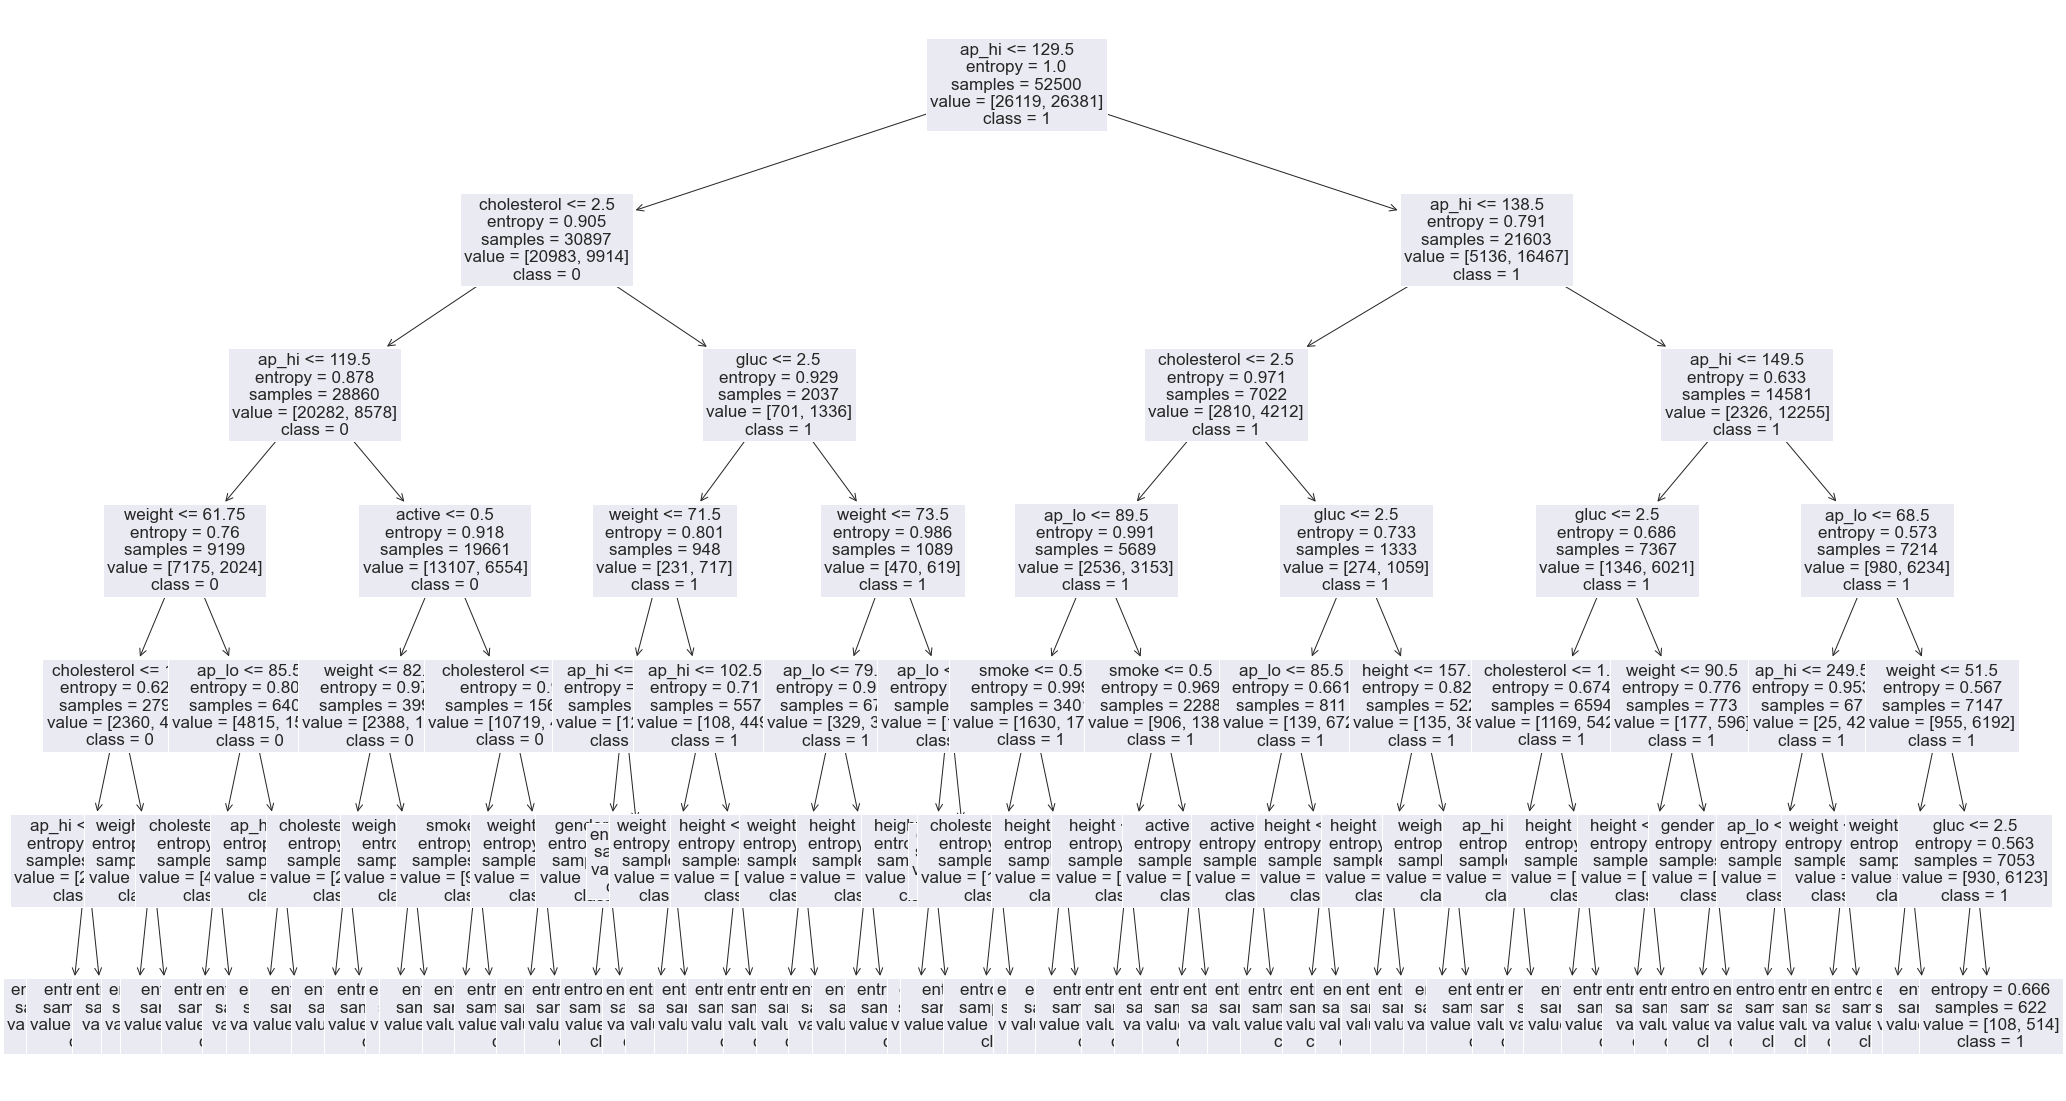

In [25]:
#Decision Tree with depth 6
dt=tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
dtClassfierEntropy= dt.fit(X_train, y_train)
y_predEntropy=dtClassfierEntropy.predict(X_test)
confusion_matrix_entropy=confusion_matrix(y_test, y_predEntropy)
class_names = ['class 0', 'class 1']
cmdfentropy= pd.DataFrame(confusion_matrix_entropy, range(2), range(2))
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
plt.figure(figsize=(35,20))
tree.plot_tree(dtClassfierEntropy,fontsize=17,feature_names=list(dataframe.columns)[1:-1],class_names=["0","1"])
plt.show()

## Naive Bayes

In [26]:
# Using navie bayes classifier to predict the dataset
model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [0 0 0 ... 0 0 0]
accuracy_score on train dataset :  0.5866285714285714
Target on test data [1 1 0 ... 0 1 0]
accuracy_score on test dataset :  0.5928


In [27]:
# printing confusion matrix
cm = confusion_matrix(y_test, predict_test)
print(cm)

[[7778 1124]
 [6002 2596]]


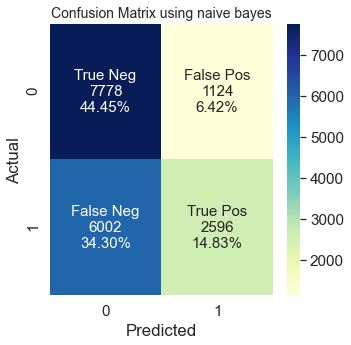

In [28]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in 
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=labels,annot_kws={"size": 15}, fmt='', cmap='YlGnBu')
plt.title("Confusion Matrix using naive bayes", fontsize=14);
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [29]:
# printing the classification report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.56      0.87      0.69      8902
           1       0.70      0.30      0.42      8598

    accuracy                           0.59     17500
   macro avg       0.63      0.59      0.55     17500
weighted avg       0.63      0.59      0.56     17500



In [30]:
dataframe.head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0
9,54.0,1,164,68.0,110,60,1,1,0,0,0,0


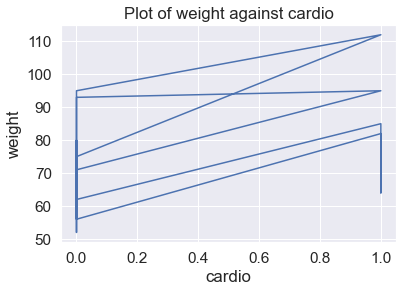

In [31]:
#Visualizing the dataset for the target variable cardio against weight

data1 = dataframe.head(20)
plt.plot(data1.cardio,data1.weight)
plt.xlabel('cardio')
plt.ylabel('weight')
plt.title("Plot of weight against cardio")
plt.show()

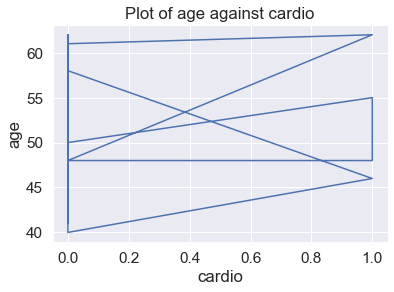

In [32]:
#Visualizing the dataset for the target variable cardio against age

data2 = dataframe.head(20)
plt.plot(data2.cardio,data2.age)
plt.xlabel('cardio')
plt.ylabel('age')
plt.title("Plot of age against cardio")
plt.show()

### References

•	https://scikit-learn.org/stable/auto_examples/index.html#classification

•	https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

•	https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

•	https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

•	https://seaborn.pydata.org/generated/seaborn.heatmap.html

•	https://seaborn.pydata.org/generated/seaborn.pairplot.html
